In [1]:
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras.models import Sequential
import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2  # only used for loading the image, you can use anything that returns the image as a np.ndarray
import os
import sys

%matplotlib inline

Using TensorFlow backend.


In [2]:
panda = cv2.imread('panda.png')

TypeError: Image data cannot be converted to float

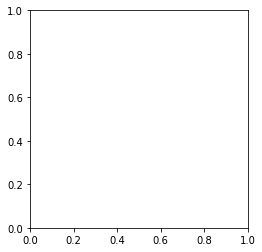

In [3]:
plt.imshow(panda)

In [3]:
panda.shape

NameError: name 'panda' is not defined

In [5]:
panda = cv2.resize(panda, (50, 76)) 

In [6]:
panda.shape

(76, 50, 3)

In [5]:
#create the first Convolutional layer
import sys
model = Sequential()
model.add(Conv2D(3, (3,3), # number of filter layers   # x and y dimension of kernel
                input_shape=panda.shape))

In [6]:
# Keras expects batches of images, so we have to add a dimension to trick it into being nice
panda_batch = np.expand_dims(panda,axis=0)

In [7]:

conv_panda = model.predict(panda_batch)

In [8]:

panda = cv2.resize(panda, (50, 76)) 

In [1]:
# here we get rid of that added dimension and plot the image
def visualize_panda(model, panda):
    # Keras expects batches of images, so we have to add a dimension to trick it into being nice
    panda_batch = np.expand_dims(panda,axis=0)
    conv_panda = model.predict(panda_batch)
    conv_panda = np.squeeze(conv_panda, axis=0)
    print (conv_panda.shape)
    plt.imshow((conv_panda * 255).astype(np.uint8))

In [2]:
visualize_panda(model, panda)

NameError: name 'model' is not defined

(751, 491, 3)


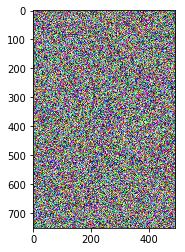

In [10]:
model = Sequential()
model.add(Conv2D(3,(10,10), input_shape=panda.shape))
visualize_panda(model, panda)

In [11]:
#panda with 1 filter
# Note: matplot lib is pretty inconsistent with how it plots these weird cat arrays.
# Try running them a couple of times if the output doesn't quite match the blog post results.
def nice_panda_printer(model, panda):
    '''prints the panda as a 2d array'''
    panda_batch = np.expand_dims(panda,axis=0)
    conv_panda2 = model.predict(panda_batch)

    conv_panda2 = np.squeeze(conv_panda2, axis=0)
    print (conv_panda2.shape)
    conv_panda2 = conv_panda2.reshape(conv_panda2.shape[:2])

    print (conv_panda2.shape)
    plt.imshow(conv_panda2)

(758, 498, 1)
(758, 498)


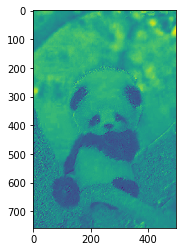

In [12]:
model = Sequential()
model.add(Conv2D(1, (3,3),input_shape=panda.shape))

# Keras expects batches of images, so we have to add a dimension to trick it into being nice
nice_panda_printer(model, panda)
#visualize_panda(model, panda)

(746, 486, 1)
(746, 486)


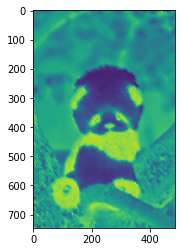

In [13]:
# 15x15 kernel size
model = Sequential()
model.add(Conv2D(1, (15,15), input_shape=panda.shape))

nice_panda_printer(model, panda)


(758, 498, 1)
(758, 498)


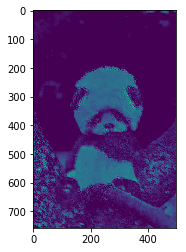

In [15]:
#add relu activation
model = Sequential()
model.add(Conv2D(1, (3,3), input_shape=panda.shape))
# Lets add a new activation layer!
model.add(Activation('relu'))

nice_panda_printer(model, panda)

(758, 498, 3)


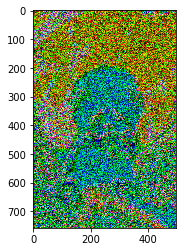

In [21]:

model = Sequential()
model.add(Conv2D(3, (3,3),input_shape=panda.shape))
# Lets add a new activation layer!
model.add(Activation('relu'))
visualize_panda(model, panda)

(151, 99, 1)
(151, 99)


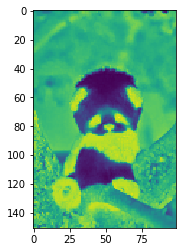

In [22]:
#max pooling
model = Sequential()
model.add(Conv2D(1, (3,3),input_shape=panda.shape))
# Lets add a new max pooling layer!
model.add(MaxPooling2D(pool_size=(5,5)))

nice_panda_printer(model, panda)

(151, 99, 3)


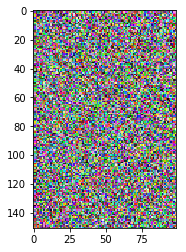

In [24]:
model = Sequential()
model.add(Conv2D(3,(3,3), input_shape=panda.shape))
# Lets add a new max pooling layer!
model.add(MaxPooling2D(pool_size=(5,5)))

# nice_cat_printer(model, cat)
visualize_panda(model, panda)

(151, 99, 1)
(151, 99)


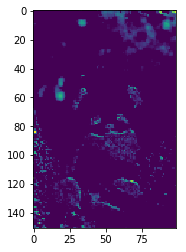

In [25]:
#activation then pooling
model = Sequential()
model.add(Conv2D(1, (3,3),input_shape=panda.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

nice_panda_printer(model, panda)

(151, 99, 3)


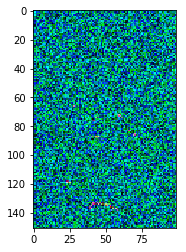

In [26]:
model = Sequential()
model.add(Conv2D(3, (3,3),input_shape=panda.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

visualize_panda(model, panda)

(83, 54, 1)
(83, 54)


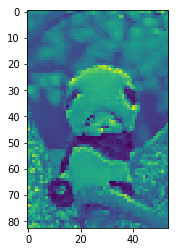

In [27]:
#Panda after the convolutional and pooling stages of LeNet
# 1 filter in each conv layer for pretty printing
model = Sequential()
model.add(Conv2D(1, (3,3),input_shape=panda.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(1, (3,3),input_shape=panda.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

nice_panda_printer(model, panda)

(125, 82, 1)
(125, 82)


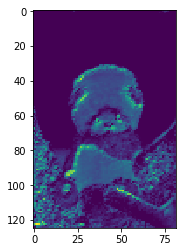

In [33]:

# 3 filters in conv1, then 1 filter for pretty printing
model = Sequential()
model.add(Conv2D(3, (3,3),input_shape=panda.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(1, (3,3),input_shape=panda.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

nice_panda_printer(model, panda)

(125, 82, 3)


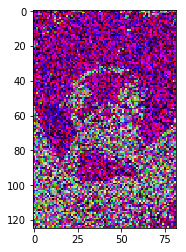

In [34]:
# 3 filters in both conv layers
model = Sequential()
model.add(Conv2D(3, (3,3),input_shape=panda.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(3, (3,3),input_shape=panda.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

visualize_panda(model, panda)